In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler , LabelEncoder

### Importing data

In [2]:
sales = pd.read_csv('sales_train.csv')
items = pd.read_csv('items.csv')
item_cat = pd.read_csv('item_categories.csv')
test = pd.read_csv('test.csv')
shops = pd.read_csv('shops.csv')

### Checking the shape feature types and missing values in the datasets.

In [3]:
print('The dimension of the training set is:',sales.shape,'\n')
print('The feature types are:\n', sales.dtypes,'\n')
print('Number of missing values:\n',sales.isnull().sum())
sales.head(3)

The dimension of the training set is: (2935849, 6) 

The feature types are:
 date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object 

Number of missing values:
 date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0
2,05.01.2013,0,25,2552,899.0,-1.0


In [4]:
print('The dimension of the test set is:',test.shape,'\n')
print('The feature types are:\n', test.dtypes,'\n')
print('Number of missing values:\n',test.isnull().sum())
test.head(3)

The dimension of the test set is: (214200, 3) 

The feature types are:
 ID         int64
shop_id    int64
item_id    int64
dtype: object 

Number of missing values:
 ID         0
shop_id    0
item_id    0
dtype: int64


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233


In [5]:
print('The dimension of the items set is:',items.shape,'\n')
print('The feature types are:\n', items.dtypes,'\n')
print('Number of missing values:\n',items.isnull().sum())
items.head(3)

The dimension of the items set is: (22170, 3) 

The feature types are:
 item_name           object
item_id              int64
item_category_id     int64
dtype: object 

Number of missing values:
 item_name           0
item_id             0
item_category_id    0
dtype: int64


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40


In [6]:
print('The dimension of the items categories is:',item_cat.shape,'\n')
print('The feature types are:\n', item_cat.dtypes,'\n')
print('Number of missing values:\n', item_cat.isnull().sum())
item_cat.head(3)

The dimension of the items categories is: (84, 2) 

The feature types are:
 item_category_name    object
item_category_id       int64
dtype: object 

Number of missing values:
 item_category_name    0
item_category_id      0
dtype: int64


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2


In [7]:
print('The dimension of the shops set is:',shops.shape,'\n')
print('The feature types are:\n', shops.dtypes,'\n')
print('Number of missing values:\n', shops.isnull().sum())
shops.head(3)

The dimension of the shops set is: (60, 2) 

The feature types are:
 shop_name    object
shop_id       int64
dtype: object 

Number of missing values:
 shop_name    0
shop_id      0
dtype: int64


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2


### Converting date column to datetime

In [8]:
date = sales.date.apply(lambda x:dt.datetime.strptime(x, '%d.%m.%Y'))

# Create 3 new features for year, month and day
sales['year'] = date.dt.year
sales['month'] = date.dt.month
sales['day'] = date.dt.day
sales.head()

# Remove the "date" feature
sales = sales.drop('date', axis=1)

In [9]:
# Add the "item_category_id" to the dataset
sales = pd.merge(sales, items.drop('item_name', axis=1), on='item_id')
sales.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,item_category_id
0,0,59,22154,999.0,1.0,2013,1,2,37
1,0,24,22154,999.0,1.0,2013,1,23,37
2,0,27,22154,999.0,1.0,2013,1,20,37
3,0,25,22154,999.0,1.0,2013,1,2,37
4,0,25,22154,999.0,1.0,2013,1,3,37


In [10]:
# Create "revenue" feature
sales['revenue'] = sales.item_price*sales.item_cnt_day
sales.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,item_category_id,revenue
0,0,59,22154,999.0,1.0,2013,1,2,37,999.0
1,0,24,22154,999.0,1.0,2013,1,23,37,999.0
2,0,27,22154,999.0,1.0,2013,1,20,37,999.0
3,0,25,22154,999.0,1.0,2013,1,2,37,999.0
4,0,25,22154,999.0,1.0,2013,1,3,37,999.0


Text(0.5, 1.0, 'item_cnt_day vs month')

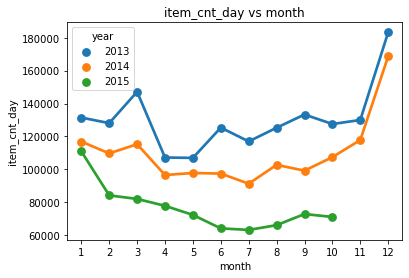

In [11]:
grouped = pd.DataFrame(sales.groupby(['year','month'])['item_cnt_day'].sum().reset_index())
sns.pointplot(x='month', y='item_cnt_day', hue='year', data=grouped)
plt.title('item_cnt_day vs month')

Text(0.5, 1.0, 'item_price vs month')

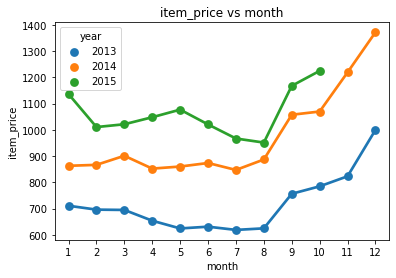

In [12]:
grouped_price = pd.DataFrame(sales.groupby(['year','month'])['item_price'].mean().reset_index())
sns.pointplot(x='month', y='item_price', hue='year', data=grouped_price)
plt.title('item_price vs month')

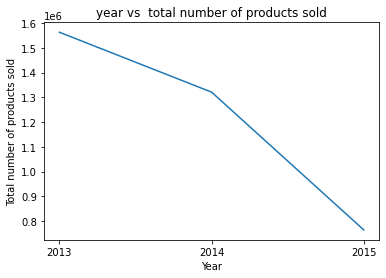

In [13]:
sales.groupby('year').item_cnt_day.sum().plot()
plt.xticks(np.arange(2013, 2016, 1))
plt.title('year vs  total number of products sold')
plt.xlabel('Year')
plt.ylabel('Total number of products sold')
plt.show()

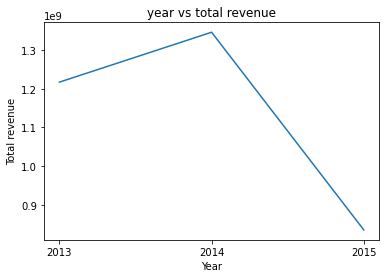

In [14]:
sales.groupby('year').revenue.sum().plot()
plt.xticks(np.arange(2013, 2016, 1))
plt.title('year vs total revenue')
plt.xlabel('Year')
plt.ylabel('Total revenue')
plt.show()

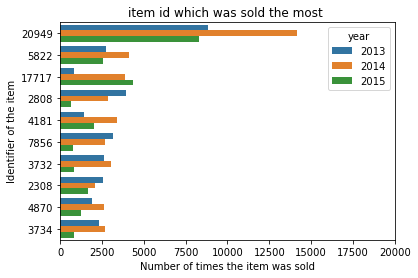

In [15]:
sns.countplot(y='item_id', hue='year', data=sales, order = sales['item_id'].value_counts().iloc[:10].index)
plt.xlim(0,20000)
plt.title('item id which was sold the most ')
plt.xlabel('Number of times the item was sold')
plt.ylabel('Identifier of the item')
plt.show()


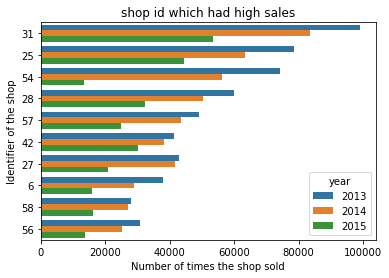

In [16]:
sns.countplot(y='shop_id', hue='year', data=sales, order = sales['shop_id'].value_counts().iloc[:10].index)
plt.title('shop id which had high sales') 
plt.xlabel('Number of times the shop sold')
plt.ylabel('Identifier of the shop')
plt.show()

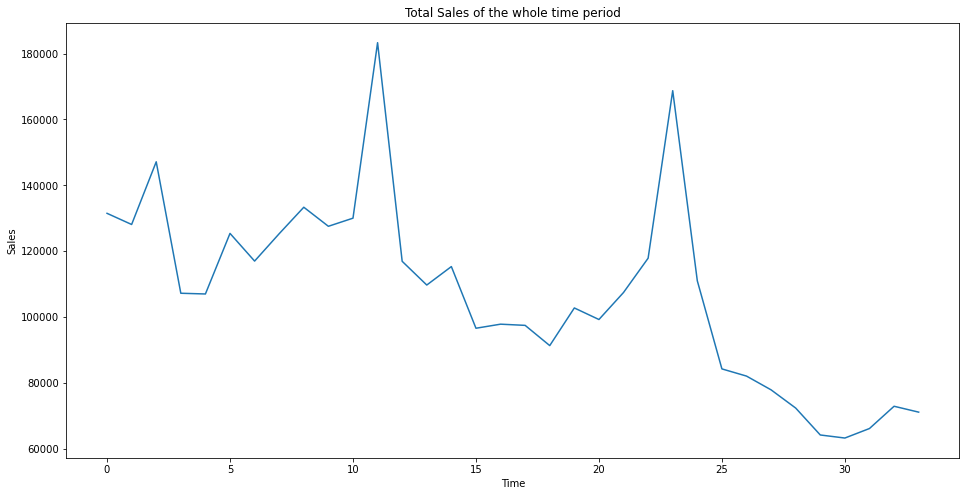

In [17]:
#Total sales per month 
ts=sales.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('Total Sales of the whole time period')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts);

### From the above plotting of various charts we can see the following observations:

1.The seasonality of the number of sales recur reasonably every year around year end time.(especially around the last two months.)

2.According to them item_price vs month graph, we are expecting more sales towards the end of 2015.

## Data Cleaning

### Checking for outliers 

In [18]:
sales.describe(include='all')

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,item_category_id,revenue
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,2.013777e+03,6.247717e+00,1.585267e+01,4.000138e+01,1.157732e+03
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,7.684790e-01,3.536219e+00,8.923483e+00,1.710076e+01,5.683604e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,2.013000e+03,1.000000e+00,1.000000e+00,0.000000e+00,-6.897000e+04
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,2.800000e+01,2.490000e+02
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,4.000000e+01,4.490000e+02
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,2.014000e+03,9.000000e+00,2.400000e+01,5.500000e+01,1.078200e+03
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,2.015000e+03,1.200000e+01,3.100000e+01,8.300000e+01,1.829990e+06


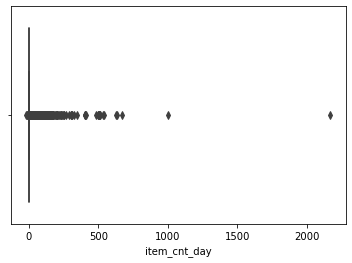

In [19]:
sns.boxplot( x= sales.item_cnt_day )

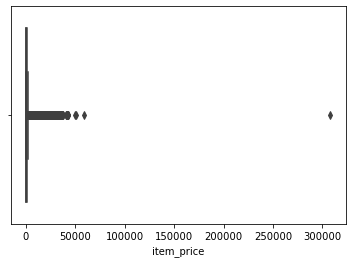

In [20]:
sns.boxplot( x= sales.item_price )

In [21]:
sales = sales[sales.item_price<100000] 
sales = sales[sales.item_cnt_day<1000] 
sales = sales[sales.item_price > 0].reset_index(drop=True) 
sales.loc[sales.item_cnt_day < 0, 'item_cnt_day'] = 0

In [22]:
#Replacing the values with uneven data with the median of those production in other shops

In [23]:
median = sales[(sales.shop_id==32)&(sales.item_id==2973)&(sales.date_block_num==4)&(sales.item_price>0)].item_price.median()
sales.loc[sales.item_price<0, 'item_price'] = median

In [24]:
sales.loc[sales.shop_id == 0, 'shop_id'] = 57
test.loc[test.shop_id == 0, 'shop_id'] = 57
sales.loc[sales.shop_id == 1, 'shop_id'] = 58
test.loc[test.shop_id == 1, 'shop_id'] = 58
sales.loc[sales.shop_id == 10, 'shop_id'] = 11
test.loc[test.shop_id == 10, 'shop_id'] = 11

In [25]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [26]:
shops.loc[shops.shop_name == 'Сергиев Посад ТЦ "7Я"', 'shop_name'] = 'СергиевПосад ТЦ "7Я"'
shops['city'] = shops['shop_name'].str.split(' ').map(lambda x: x[0])
shops.loc[shops.city == '!Якутск', 'city'] = 'Якутск'
shops['city_code'] = LabelEncoder().fit_transform(shops['city'])
shops = shops[['shop_id','city_code']]

item_cat['split'] = item_cat['item_category_name'].str.split('-')
item_cat['type'] = item_cat['split'].map(lambda x: x[0].strip())
item_cat['type_code'] = LabelEncoder().fit_transform(item_cat['type'])
# if subtype is nan then type
item_cat['subtype'] = item_cat['split'].map(lambda x: x[1].strip() if len(x) > 1 else x[0].strip())
item_cat['subtype_code'] = LabelEncoder().fit_transform(item_cat['subtype'])
item_cat = item_cat[['item_category_id','type_code', 'subtype_code']]

items.drop(['item_name'], axis=1, inplace=True)

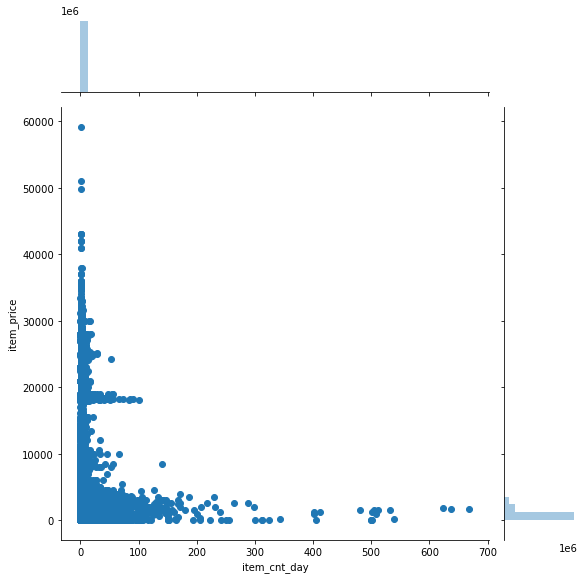

Text(0.5, 1.0, 'item_cnt_day vs month')

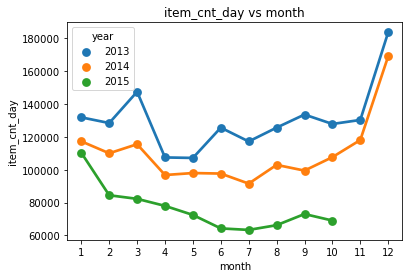

In [27]:
#Plotting after removing outliers 
sns.jointplot(x="item_cnt_day", y="item_price", data=sales, height=8)
plt.show()

cleaned = pd.DataFrame(sales.groupby(['year','month'])['item_cnt_day'].sum().reset_index())
sns.pointplot(x='month', y='item_cnt_day', hue='year', data=cleaned)
plt.title('item_cnt_day vs month')

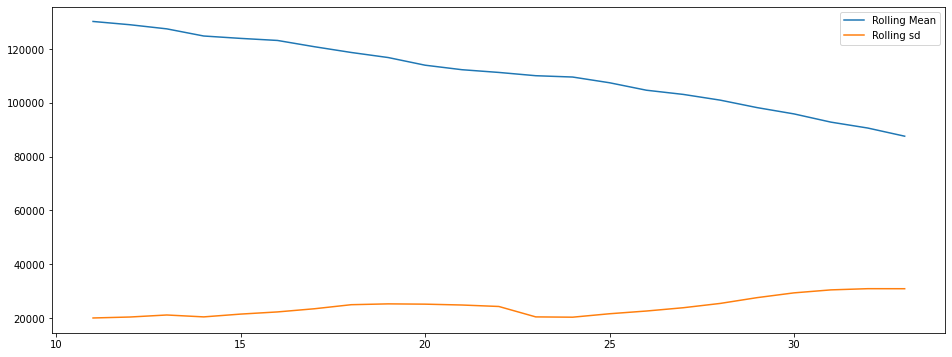

In [28]:
plt.figure(figsize=(16,6))
plt.plot(ts.rolling(window=12,center=False).mean(),label='Rolling Mean');
plt.plot(ts.rolling(window=12,center=False).std(),label='Rolling sd');
plt.legend()

 We can see that there is decreasing trend. Let us check for trend, seasonality and residuals

<ipython-input-29-ed9b12c2bd0e>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = sm.tsa.seasonal_decompose(ts.values,freq=12,model="multiplicative")


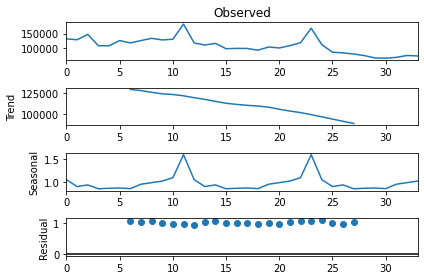

In [29]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(ts.values,freq=12,model="multiplicative")

fig = res.plot()

### Checking stationarity using ADF(Augmented Dicky Fuller Test) method

ADF is unit root test for stationarity. Unit roots can cause unpredictable results in your time series analysis. 

In [30]:
from statsmodels.tsa.stattools import adfuller

In [31]:
def test_stationarity(timeseries):
    
    print('Results of Dickey-Fuller Test:')
    
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                 -2.395704
p-value                         0.142953
#Lags Used                      0.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


#### Removing trend

In [32]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

def inverse_difference(last_ob, value):
    return value + last_ob

[]

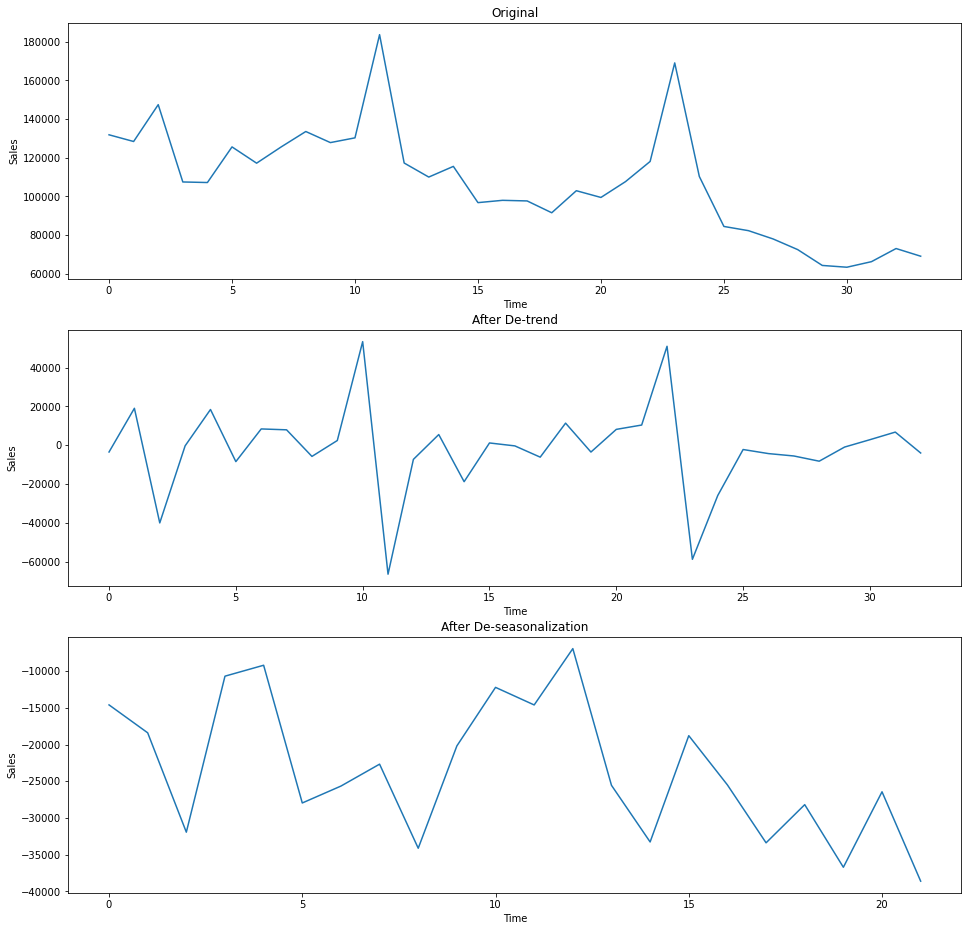

In [33]:
ts=sales.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.astype('float')
plt.figure(figsize=(16,16))
plt.subplot(311)

plt.title('Original')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts)
plt.subplot(312)

plt.title('After De-trend')
plt.xlabel('Time')
plt.ylabel('Sales')
new_ts=difference(ts)
plt.plot(new_ts)
plt.plot()

plt.subplot(313)
plt.title('After De-seasonalization')
plt.xlabel('Time')
plt.ylabel('Sales')

# Assuming that the seasonality occurs in about 12 months.
new_ts = difference(ts,12)
plt.plot(new_ts)
plt.plot()

In [34]:
test_stationarity(new_ts)

Results of Dickey-Fuller Test:
Test Statistic                 -3.181378
p-value                         0.021088
#Lags Used                      0.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


We may see that ou p-value is less than 5%, thus we can assume that the series is stationary. 

In [35]:
sales.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,item_category_id,revenue
0,0,59,22154,999.0,1.0,2013,1,2,37,999.0
1,0,24,22154,999.0,1.0,2013,1,23,37,999.0
2,0,27,22154,999.0,1.0,2013,1,20,37,999.0
3,0,25,22154,999.0,1.0,2013,1,2,37,999.0
4,0,25,22154,999.0,1.0,2013,1,3,37,999.0


In [36]:
sales.to_csv('sales_updates.csv')

In [37]:
item_cat.head()

,item_category_id,type_code,subtype_code
0,0,0,29
1,1,1,9
2,2,1,10
3,3,1,11
4,4,1,13


In [38]:
item_cat.to_csv('item_category_updated.csv')

In [39]:
shops.head()

,shop_id,city_code
0,0,29
1,1,29
2,2,0
3,3,1
4,4,2


In [40]:
shops.to_csv('shops_updates.csv')